In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customer_data = pd.read_csv('Customers.csv')
product_data = pd.read_csv('Products.csv')
transaction_data = pd.read_csv('Transactions.csv')
# Task 1: Exploratory Data Analysis (EDA)
# Merge datasets for comprehensive analysis
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# 1. Basic statistics and missing values
print(data.info())
print(data.describe())
print(data.isnull().sum())

# 2. Top products by sales volume
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity Sold:\n", top_products)

# 3. Revenue by region
revenue_region = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:\n", revenue_region)

# 4. Customer signups over time
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
monthly_signups = data.groupby(data['SignupDate'].dt.to_period('M'))['CustomerID'].nunique()

# 5. Correlation between price and quantity
# Check if Price_x and Price_y exist
if 'Price_x' in data.columns and 'Price_y' in data.columns:
    # Check if the columns are identical
    if data['Price_x'].equals(data['Price_y']):
        print("Price_x and Price_y are identical.")
        data.rename(columns={'Price_x': 'Price'}, inplace=True)  # Use one column
    else:
        print("Price_x and Price_y are different.")
        # Option 1: Take the average of the two columns
        data['Price'] = data[['Price_x', 'Price_y']].mean(axis=1)
        # Option 2: Choose one based on context (e.g., 'Price_x')
        # data.rename(columns={'Price_x': 'Price'}, inplace=True)
elif 'Price_x' in data.columns:
    data.rename(columns={'Price_x': 'Price'}, inplace=True)
elif 'Price_y' in data.columns:
    data.rename(columns={'Price_y': 'Price'}, inplace=True)
else:
    raise KeyError("No Price column found in the dataset.")

# Correlation analysis between Price and Quantity




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   68


Correlation between Price and Quantity:
              Price  Quantity
Price     1.000000 -0.009378
Quantity -0.009378  1.000000


<ipython-input-43-e4ef799c1a26>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="Set2")  # Use any palette you prefer


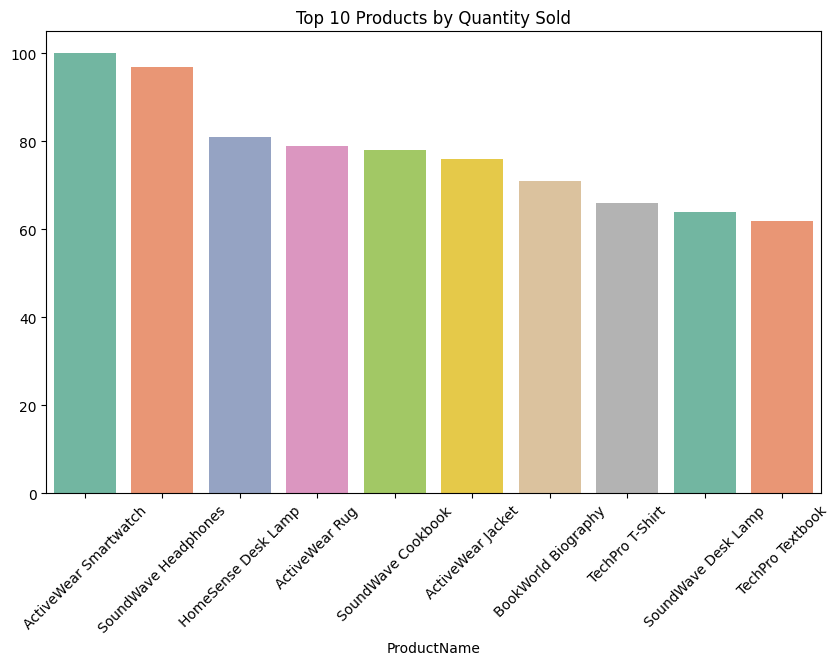

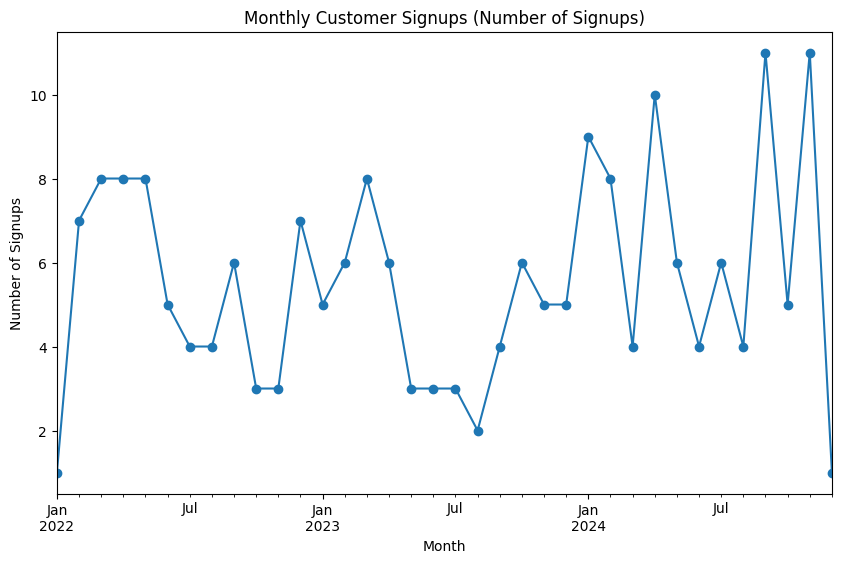

In [43]:
correlation_matrix = data[['Price', 'Quantity']].corr()
print("\nCorrelation between Price and Quantity:\n", correlation_matrix)
# Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="Set2")  # Use any palette you prefer
plt.title('Top 10 Products by Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Line graph with measurements (showing values at each data point)
plt.figure(figsize=(10, 6))
ax = monthly_signups.plot(kind='line', marker='o')
plt.title('Monthly Customer Signups (Number of Signups)')
plt.xlabel('Month')
plt.ylabel('Number of Signups')

# Adding the data points with the unit in the annotations

plt.show()